# Pipeline Step 5: Train and evaluate the model

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_all = np.load('x_36_all.npy')
y_all = np.load('y_36_all.npy')

In [3]:
# For now, use only 100,000 sequences to speed up training. 
x_all = np.log(x_all[:100000])
y_all = np.log(y_all[:100000])

In [4]:
#create test and training sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.20)

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten

drop_prob = 0.3

model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='relu',
               input_shape=(x_all.shape[1], x_all.shape[2]))) # returns a sequence of vectors of dim 128
model.add(LSTM(32, return_sequences=True, activation='relu', dropout=drop_prob, recurrent_dropout=drop_prob))  # returns a sequence of vectors of dimension 32

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(drop_prob))

model.add(Dense(64, activation='relu'))
model.add(Dropout(drop_prob))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.


In [6]:
res = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 109s - loss: 1.5926 - val_loss: 2.4224
Epoch 2/10
80000/80000 [==============================] - 97s - loss: 0.8384 - val_loss: 1.8071
Epoch 3/10
80000/80000 [==============================] - 95s - loss: 0.7010 - val_loss: 1.3194
Epoch 4/10
80000/80000 [==============================] - 94s - loss: 0.6091 - val_loss: 1.2707
Epoch 5/10
80000/80000 [==============================] - 94s - loss: 0.5354 - val_loss: 1.0868
Epoch 6/10
80000/80000 [==============================] - 94s - loss: 0.4701 - val_loss: 1.1584
Epoch 7/10
80000/80000 [==============================] - 95s - loss: 0.4280 - val_loss: 0.9497
Epoch 8/10
80000/80000 [==============================] - 96s - loss: 0.3904 - val_loss: 0.6960
Epoch 9/10
80000/80000 [==============================] - 96s - loss: 0.3580 - val_loss: 0.5834
Epoch 10/10
80000/80000 [==============================] - 95s - loss: 0.3313 - val_l

In [7]:
y_pred = model.predict(x_test)

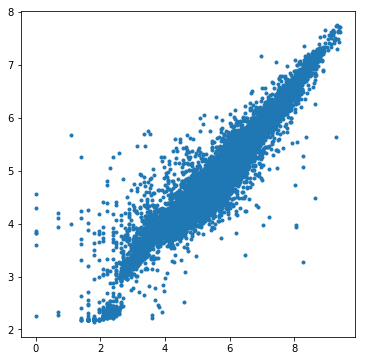

In [8]:
plt.figure(figsize=(6,6))
plt.plot(y_test, y_pred, '.');

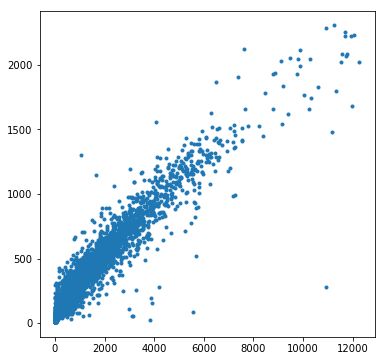

In [9]:
plt.figure(figsize=(6,6))
plt.plot(np.exp(y_test), np.exp(y_pred),'.');